In [1]:
from numpy.random import randint
from random import random
from numpy import copy,zeros,array,newaxis,exp,dot,sqrt,reshape,loadtxt,fill_diagonal
from pylab import imshow,show,subplots

# Esto no es lo ideal, habría que meterle N como **kwargs a g
N = 81
L = 9

def E(S,J): #Funcion que toma la configuracion de spines y las constantes de acoplo y devuelve la energia
    return(-0.5*float(dot(S,dot(J,S.T))))


def g(S, J):
    i = randint(0,N)
    S_moved = copy(S)
    if S_moved[i] < 0:
        S_moved[i] = 1
    else:
        S_moved[i] = -1

    dE = E(S_moved,J) - E(S,J)

    if random() < exp(-dE/T):
         return(copy(S_moved))
    else:
        return(S)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

def iterate_plot(nsteps):
    
    memory = loadtxt(memory_txt)#[newaxis] OJO! utilizar [newaxis] solo si vais a introducir un solo estado de memoria, en caso contrario borradlo
    K = memory.shape[0] #numero de estamos de memoria
    N = memory.shape[1] #numero de spines de la red (debe tener raiz entera)
    L = int(sqrt(N)) #tamaño de la red cuadrada de spines
    J = zeros([N,N],float)
    
    for k in range(K):
        xi = memory[k,:][newaxis]
        J += N**(-1)*(dot(xi.T,xi)) #Calculamos las constantes de acoplo (Eq 1.5 del paper de Amit et al.)
        fill_diagonal(J, 0)
        
    S = 2*randint(0,2,[1,N]) - 1 
    S_mat = reshape(S,(L,L))

    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons=N)
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(L, L)

    hopfield_net.weights = J

    # set user defined function to update the state
    hopfield_net.set_dynamics_to_user_function(g)
    # hopfield_net.set_dynamics_sign_sync()

    states = hopfield_net.run_with_monitoring(nr_steps=nsteps)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states[0:nsteps:round(nsteps/10)])
    # plot the states of the network (10 equispaced states)
    old = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (20, 20) # Bigger size
    plot_tools.plot_pattern_list(states_as_patterns)
    plt.rcParams["figure.figsize"] = old

    inicial_txt = 'Configuración inicial : T = %.2f ; Steps = %i' %(T,steps)
    final_txt = 'Configuración final : T = %.2f ; Steps = %i' %(T,steps)
    
    plot_tools.plot_pattern(reshape(states[0], (L, L)))
    print(inicial_txt)
    plot_tools.plot_pattern(reshape(states[-1], (L, L)))
    print(final_txt)

    return states, hopfield_net.weights
    

/home/julian/.virtualenvs/hopfield/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


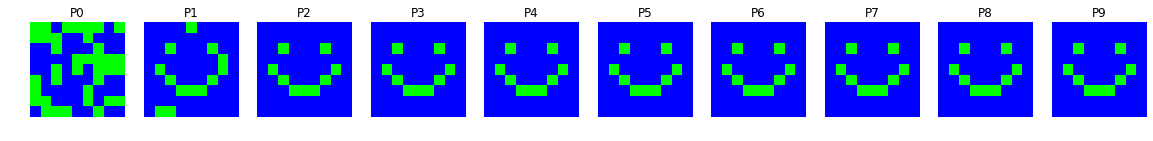

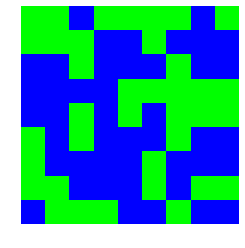

Configuración inicial : T = 0.00 ; Steps = 2000


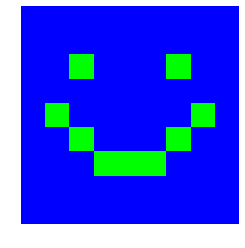

Configuración final : T = 0.00 ; Steps = 2000


In [14]:
#Parametros
T = 1e-10 #Temperatura
steps = 2000 #numero de pasos de Monte Carlo
memory_txt = 'faces.txt' #nombre del archivo con los estados de memoria
#Parametros

S, J = iterate_plot(steps)

S_mat = reshape(S,(steps+1, L,L))